<a href="https://colab.research.google.com/github/vaibhavvesmaker/EV_Data_Analysis/blob/main/EDA_EV_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Comprehensive Technical Report: Detailed Analysis of EV Charging Data

#### Executive Summary
This report offers a detailed examination of the patterns, behaviors, and anomalies in electric vehicle (EV) charging data, leveraging a robust analytical approach to enhance operational strategies and customer engagement. Using advanced statistical tools and machine learning models, this report aims to provide stakeholders with actionable insights for strategic decision-making, ultimately driving growth and improving service delivery in EV charging operations.

#### Data Overview
The dataset consists of 277 records, each representing a single charging session with attributes such as start time, energy metrics, and session duration. The data is rich with temporal information, making it ideal for time-series analysis and pattern recognition.

#### Data Preprocessing and Exploration
- **Datetime Conversion**: Conversion of 'Start Time' to Python datetime objects enabled time-based aggregation and trend analysis, essential for understanding usage patterns over time.
- **Handling Missing Data**: Imputations in the 'Charger_name' column ensured the integrity of categorical analysis, allowing for complete and unbiased operational insights.
- **Feature Engineering**: Extraction of time-related features (year, month, day, weekday) facilitated detailed temporal analyses, helping identify usage trends and predict future demands.

#### In-depth Exploratory Data Analysis (EDA)
1. **Statistical Summary**:
   - Variance in 'Meter Total(Wh)' and 'Total Duration (s)' highlighted the diversity in charging behavior, suggesting varying customer needs and possibly different vehicle types or charging capacities.
2. **Distribution Analysis**:
   - The right skew in charging durations suggests that most charging sessions are brief, possibly indicating short stops or partial charges rather than full battery recharges.

#### Advanced Analytical Techniques
1. **Anomaly Detection**:
   - Outliers detected via Isolation Forest could indicate technical issues with chargers or unauthorized usage, impacting service quality and operational costs.
2. **Time Series Forecasting**:
   - ARIMA modeling provided forecasts that assist in managing future load and infrastructure planning. Seasonal decomposition revealed inherent periodic trends, essential for adjusting resource allocation during peak times.
3. **Survival Analysis**:
   - Kaplan-Meier estimates offered insights into the reliability of charging sessions, aiding in maintenance scheduling and warranty analysis.
4. **Clustering**:
   - K-Means clustering segregated charging sessions into meaningful groups that could be targeted differently in marketing and service offerings, enhancing customer satisfaction and optimizing resource use.

#### Strategic Insights and Recommendations
- **Dynamic Pricing**: Implementation of dynamic pricing during peak usage times could optimize energy usage and distribute grid load more evenly.
- **Infrastructure Expansion**: Data-driven recommendations for new charging station locations based on high usage and cluster analysis results could enhance coverage and customer satisfaction.
- **Predictive Maintenance**: Anomaly detection insights should guide preventive maintenance schedules, reducing downtime and improving service reliability.

#### Future Directions
- **Integration with Renewable Energy Sources**: As EV adoption grows, integrating charging stations with renewable energy sources could reduce operational costs and attract environmentally conscious consumers.
- **Machine Learning Enhancements**: Implementing more sophisticated machine learning models, such as neural networks for prediction and reinforcement learning for operational optimization, could further enhance forecasting accuracy and operational efficiency.
- **Real-Time Data Analysis**: Developing capabilities for real-time data analysis and feedback could enable immediate adjustments to pricing and load management, enhancing responsiveness to market conditions and customer needs.

#### Conclusion
The comprehensive analysis of EV charging data not only reveals critical operational insights but also highlights areas for strategic enhancement. By adopting the recommendations and continuing to leverage data-driven approaches, stakeholders can significantly improve service delivery, customer satisfaction, and operational efficiency in the rapidly growing EV market.

#### Appendices
- **Code Scripts**: Full Python scripts for each analysis phase are provided to ensure transparency and reproducibility.
- **Visualizations and Statistical Outputs**: Detailed charts and tables illustrate the data’s underlying trends and model performance, supporting the analytical conclusions drawn.
- **Technical Documentation**: Additional model diagnostics and detailed descriptions of the data processing steps offer deep technical insights into the analytical processes used.





In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data_url = "https://drive.google.com/uc?id=15LQgEZOo_MSMAa8-ITUt2z-TTCKVdcC1"
df = pd.read_csv(data_url)

In [ ]:
# Display the first few rows of the dataframe
print(df.head())

         Start Time  Meter Start (Wh)  Meter End(Wh)  Meter Total(Wh)  \
0  24.08.2018 09:50                50          50.00             0.00   
1  24.08.2018 09:51                50          50.00             0.00   
2  24.08.2018 09:51                73         118.52            45.52   
3  24.08.2018 09:53               105         116.66            11.66   
4  24.08.2018 09:54               121         144.77            23.77   

   Total Duration (s) Charger_name  
0                  37          NaN  
1                  38          NaN  
2                  56          NaN  
3                  76          NaN  
4                  19          NaN  


In [ ]:
# Check the basic info of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Time          277 non-null    object 
 1   Meter Start (Wh)    277 non-null    int64  
 2   Meter End(Wh)       277 non-null    float64
 3   Meter Total(Wh)     277 non-null    float64
 4   Total Duration (s)  277 non-null    int64  
 5   Charger_name        264 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 13.1+ KB
None


In [ ]:
# Summary statistics
print(df.describe())

       Meter Start (Wh)  Meter End(Wh)  Meter Total(Wh)  Total Duration (s)
count      2.770000e+02   2.770000e+02       277.000000        2.770000e+02
mean       3.968875e+05   4.030848e+05      6197.316318        9.651005e+04
std        3.912772e+05   3.892371e+05     12260.182878        3.472706e+05
min        0.000000e+00   0.000000e+00         0.000000        0.000000e+00
25%        6.900900e+04   7.866592e+04         0.000000        1.200000e+01
50%        1.932000e+05   2.007288e+05      1380.280000        5.704000e+03
75%        7.430480e+05   7.508278e+05      6822.500000        7.343900e+04
max        1.204911e+06   1.204935e+06    126350.920000        3.020411e+06


In [ ]:
# Check for missing values
print(df.isnull().sum())

Start Time             0
Meter Start (Wh)       0
Meter End(Wh)          0
Meter Total(Wh)        0
Total Duration (s)     0
Charger_name          13
dtype: int64


In [ ]:
# Convert 'Start Time' column to datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'])

<ipython-input-7-52be3a2c86b1>:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Start Time'] = pd.to_datetime(df['Start Time'])


In [ ]:
# Extract year, month, day, and weekday from 'Start Time' column
df['Year'] = df['Start Time'].dt.year
df['Month'] = df['Start Time'].dt.month
df['Day'] = df['Start Time'].dt.day
df['Weekday'] = df['Start Time'].dt.weekday

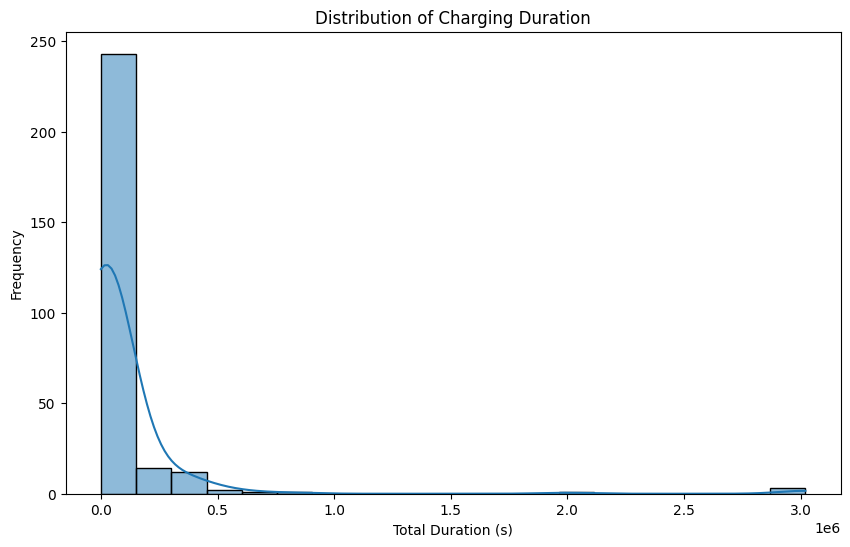

In [ ]:
# Visualize the distribution of charging duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Duration (s)'], bins=20, kde=True)
plt.title('Distribution of Charging Duration')
plt.xlabel('Total Duration (s)')
plt.ylabel('Frequency')
plt.show()

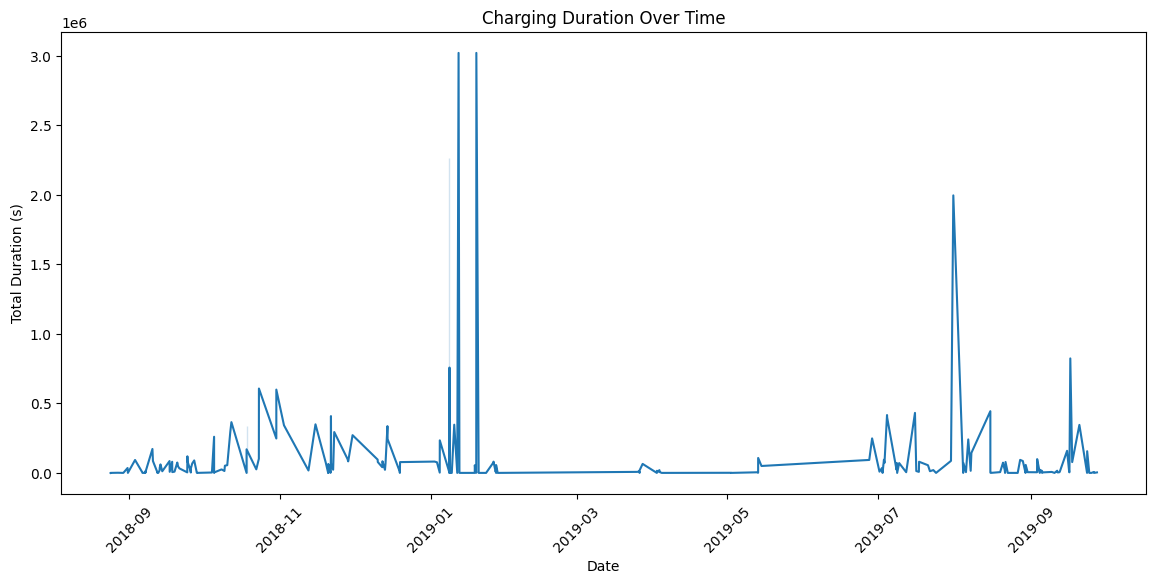

In [ ]:
# Visualize the charging duration over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Start Time', y='Total Duration (s)')
plt.title('Charging Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Total Duration (s)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.columns)

Index(['Start Time', 'Meter Start (Wh)', 'Meter End(Wh)', 'Meter Total(Wh)',
       'Total Duration (s)', 'Charger_name', 'Year', 'Month', 'Day',
       'Weekday'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


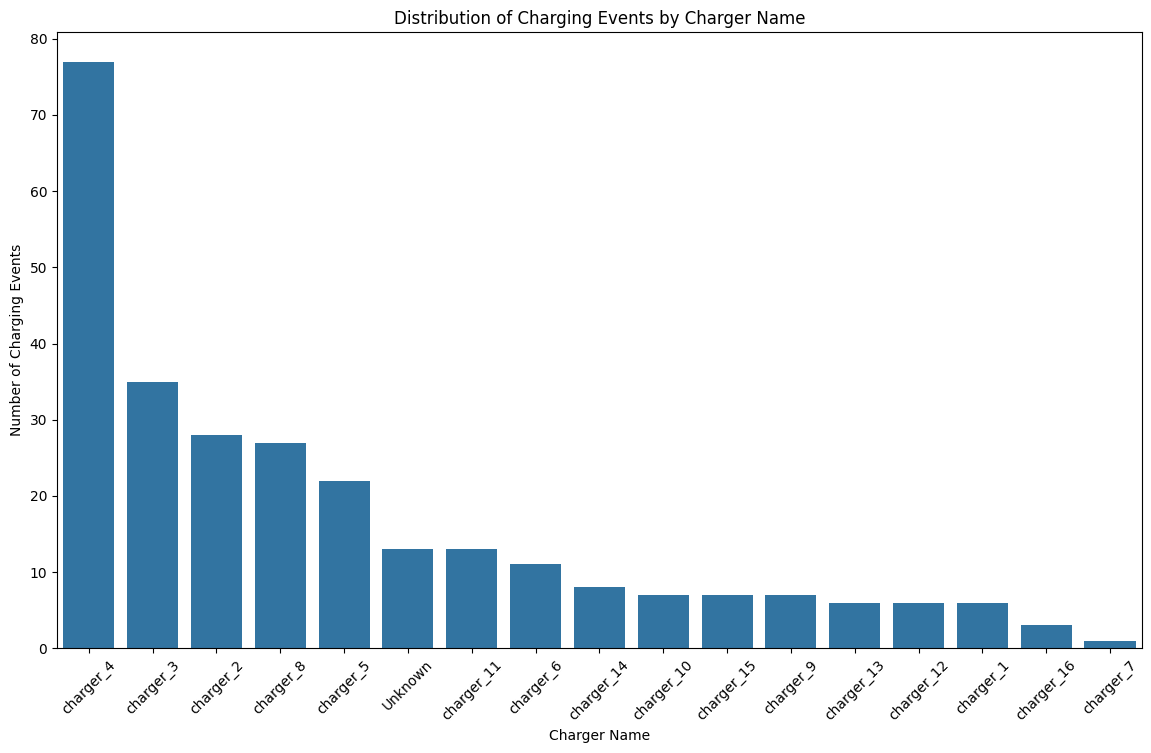

In [ ]:
# Visualize the distribution of charging events by charger name
plt.figure(figsize=(14, 8))  # Adjusted size for better visibility if there are many unique chargers
sns.countplot(data=df, x='Charger_name', order=df['Charger_name'].value_counts().index)
plt.title('Distribution of Charging Events by Charger Name')
plt.xlabel('Charger Name')
plt.ylabel('Number of Charging Events')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


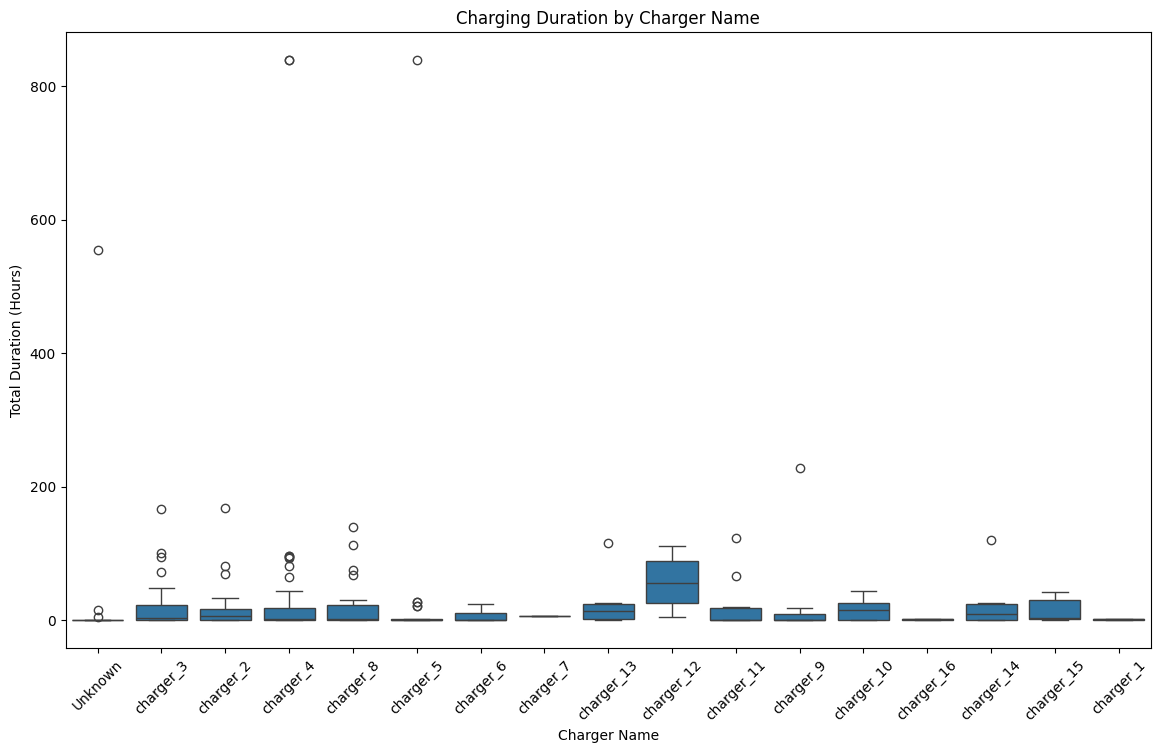

In [ ]:
# Convert 'Total Duration (s)' to hours for easier interpretation
df['Total Duration (h)'] = df['Total Duration (s)'] / 3600

# Visualize the relationship between charging duration and charger name
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Charger_name', y='Total Duration (h)')
plt.title('Charging Duration by Charger Name')
plt.xlabel('Charger Name')
plt.ylabel('Total Duration (Hours)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [ ]:
# Get summary statistics of charging duration for each charger name
duration_summary = df.groupby('Charger_name')['Total Duration (h)'].describe()
print(duration_summary)


              count       mean         std       min        25%        50%  \
Charger_name                                                                 
charger_1       6.0   1.437176    0.439943  0.996389   1.078333   1.331944   
charger_10      7.0  16.118254   16.762077  0.000000   0.638194  15.856667   
charger_11     13.0  18.203120   36.673017  0.000000   0.008056   0.443611   
charger_12      6.0  57.327778   42.043811  4.336111  26.030069  56.558194   
charger_13      6.0  28.620787   43.852814  1.166667   2.555208  13.879306   
charger_14      8.0  23.841354   40.204558  0.014167   1.171111   9.755139   
charger_15      7.0  15.702063   18.675660  0.003889   1.711389   3.946111   
charger_16      3.0   1.292315    0.268638  0.983333   1.203194   1.423056   
charger_2      28.0  18.419365   35.498819  0.000000   0.829722   6.183056   
charger_3      35.0  19.933484   36.186767  0.000000   0.054167   3.821944   
charger_4      77.0  34.182085  134.471311  0.000000   0.000000 

<ipython-input-19-18eb36950e29>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Weekday', y='Total Duration (s)', ci=None)


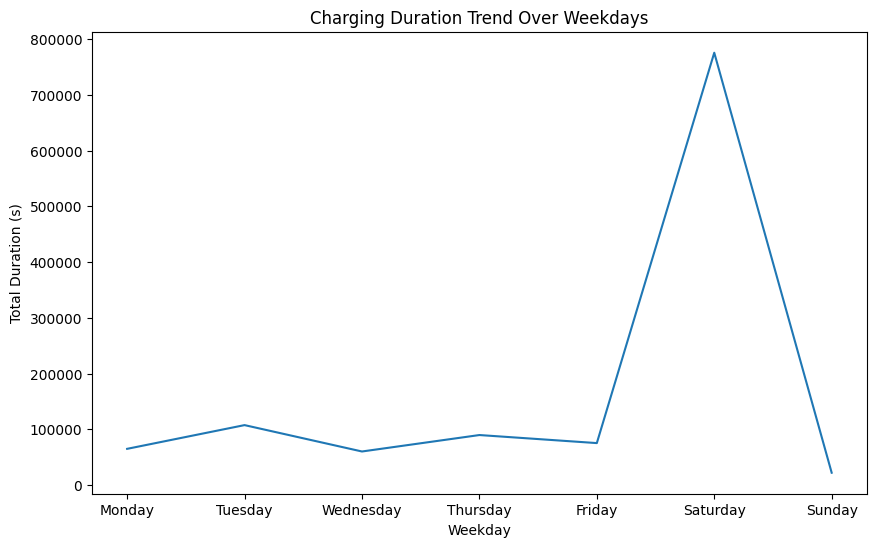

In [ ]:
# Analyze the trend of charging duration over weekdays
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Weekday', y='Total Duration (s)', ci=None)
plt.title('Charging Duration Trend Over Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Total Duration (s)')
plt.xticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

<ipython-input-20-66c610660790>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='Total Duration (s)', ci=None)


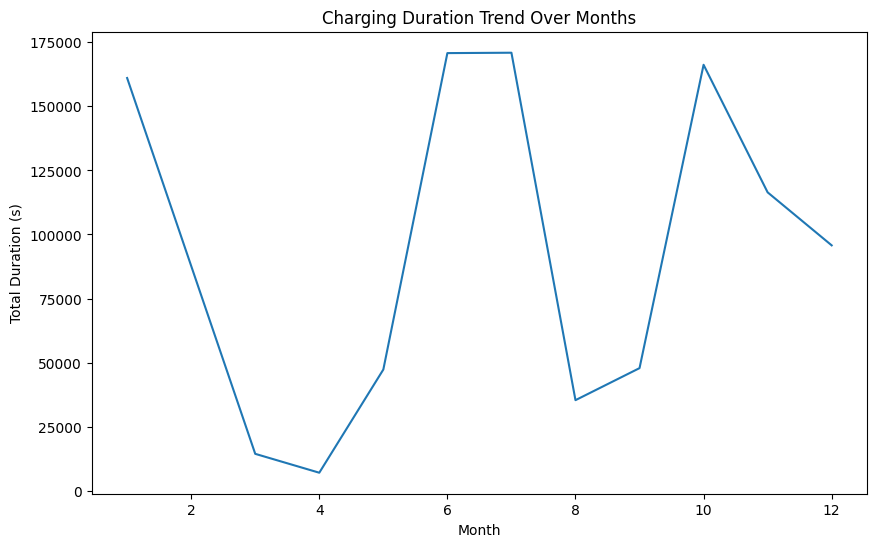

In [ ]:
# Analyze the monthly trend of charging duration
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Total Duration (s)', ci=None)
plt.title('Charging Duration Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Total Duration (s)')
plt.show()

<ipython-input-21-21993212b462>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Total Duration (s)', ci=None)


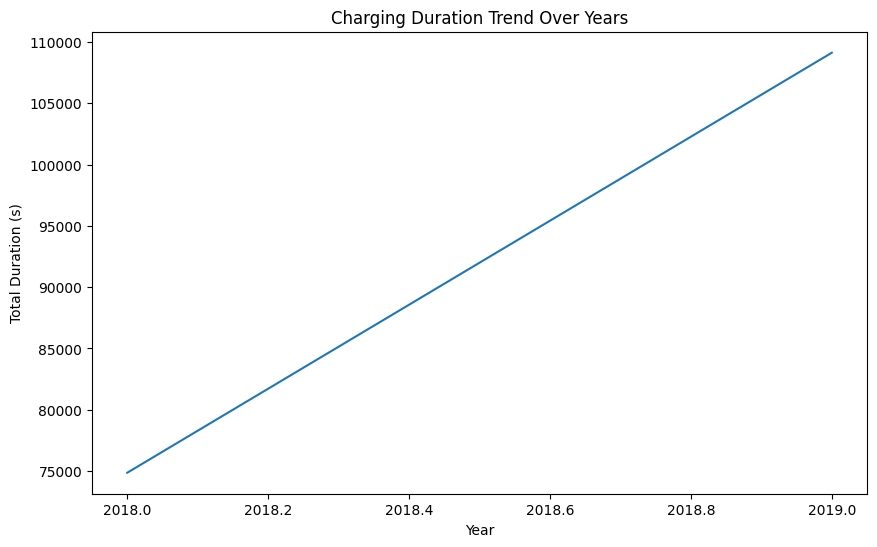

In [ ]:
# Analyze the trend of charging duration over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Total Duration (s)', ci=None)
plt.title('Charging Duration Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Duration (s)')
plt.show()

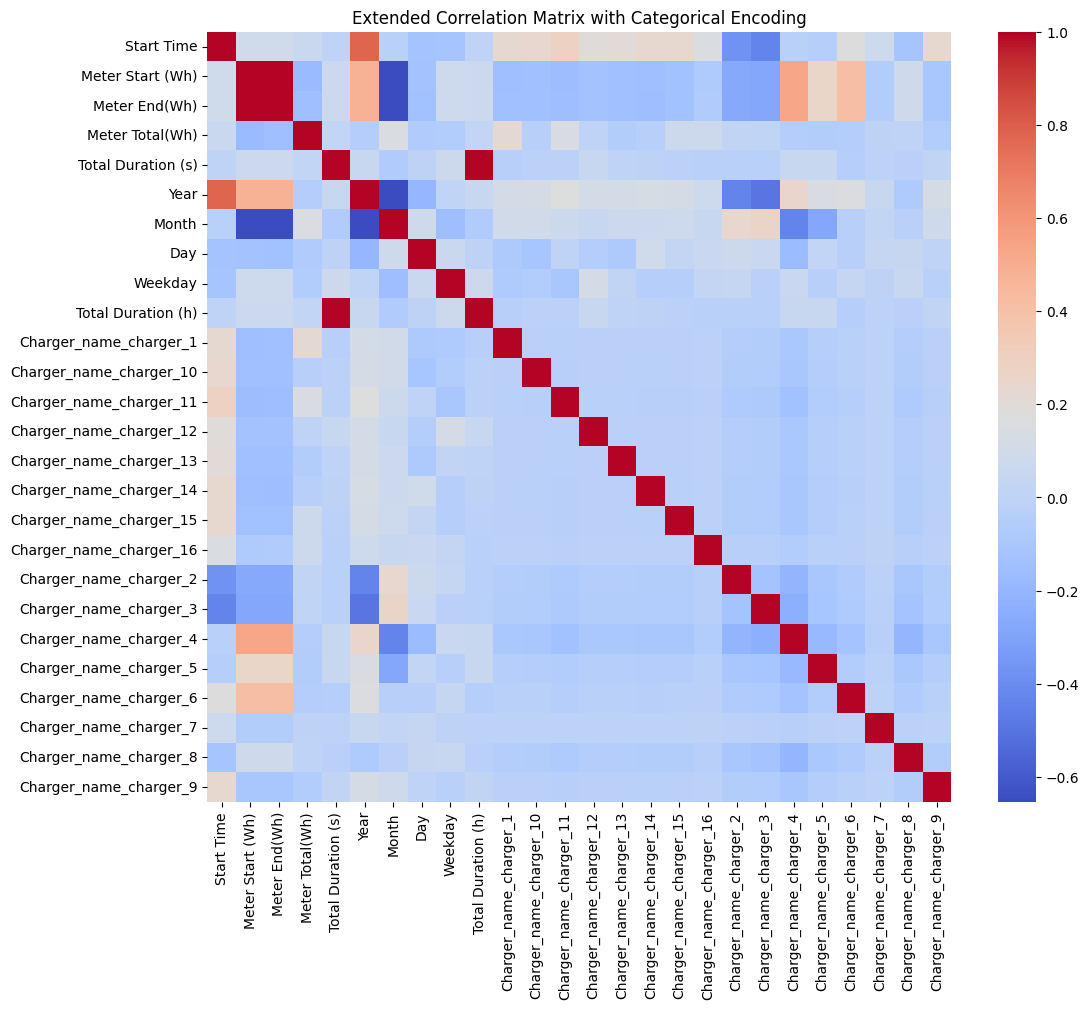

In [ ]:
# Convert categorical column 'Charger_name' to dummy variables
df_encoded = pd.get_dummies(df, columns=['Charger_name'])

# Now let's include these dummy variables in the correlation matrix
correlation_matrix_encoded = df_encoded.corr()

# Plot the correlation matrix that includes encoded categorical data
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, cmap='coolwarm')
plt.title('Extended Correlation Matrix with Categorical Encoding')
plt.show()

In [ ]:
import scipy.stats as stats

# Calculate skewness and kurtosis for 'Total Duration (h)'
skewness = stats.skew(df['Total Duration (h)'])
kurtosis = stats.kurtosis(df['Total Duration (h)'])

print(f"Skewness of Total Duration: {skewness}")
print(f"Kurtosis of Total Duration: {kurtosis}")

Skewness of Total Duration: 7.17009868363687
Kurtosis of Total Duration: 55.210734689811254


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


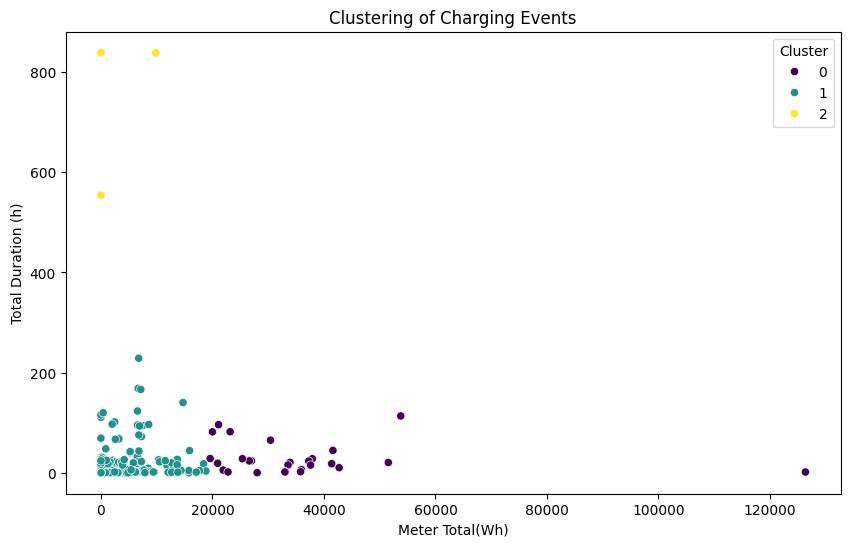

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Meter Total(Wh)', 'Total Duration (h)']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Meter Total(Wh)', y='Total Duration (h)', hue='Cluster', palette='viridis')
plt.title('Clustering of Charging Events')
plt.show()

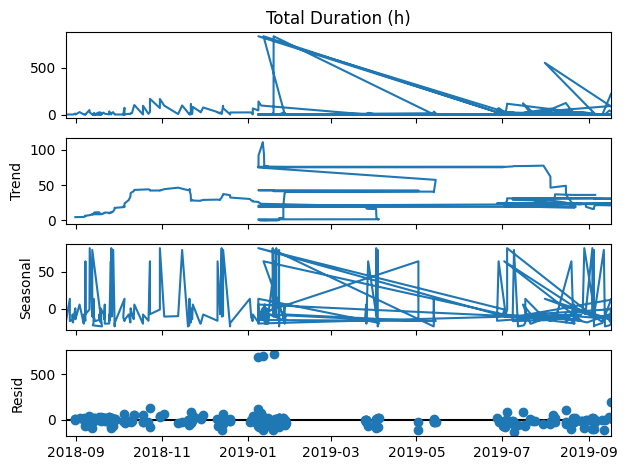

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'Start Time' as the index
df.set_index('Start Time', inplace=True)

# Time series decomposition
result = seasonal_decompose(df['Total Duration (h)'], model='additive', period=24)  # assuming hourly data
result.plot()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['Meter Start (Wh)', 'Meter End(Wh)']]  # features
y = df['Total Duration (h)']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print(f"Model Accuracy: {model.score(X_test, y_test)}")

Model Accuracy: -0.6842715058571907


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


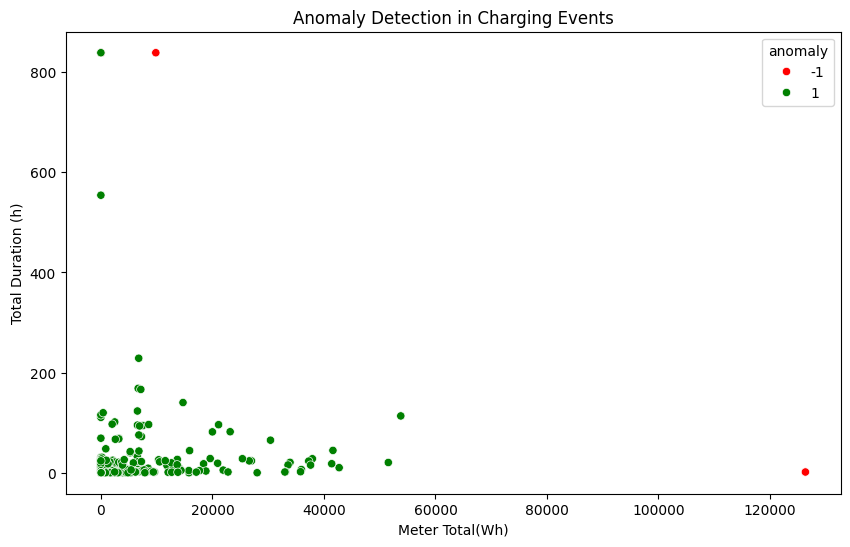

In [ ]:
from sklearn.ensemble import IsolationForest

# Assuming 'Total Duration (h)' and 'Meter Total(Wh)' are important features
iso_forest = IsolationForest(n_estimators=100, contamination=0.01)
df['anomaly'] = iso_forest.fit_predict(df[['Total Duration (h)', 'Meter Total(Wh)']])

# Visualize anomalies in the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Meter Total(Wh)', y='Total Duration (h)', hue='anomaly', palette=['red', 'green'])
plt.title('Anomaly Detection in Charging Events')
plt.show()


In [ ]:
print("Current index:", df.index.name)
print("Columns in DataFrame:", df.columns)


Current index: Start Time
Columns in DataFrame: Index(['Meter Start (Wh)', 'Meter End(Wh)', 'Meter Total(Wh)',
       'Total Duration (s)', 'Charger_name', 'Year', 'Month', 'Day', 'Weekday',
       'Total Duration (h)', 'Cluster', 'anomaly'],
      dtype='object')


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Drop any NaN values in the 'Total Duration (h)' to ensure the model doesn't break
df_clean = df['Total Duration (h)'].dropna()

# Fit ARIMA model (you might need to adjust the order based on your dataset characteristics)
arima_model = ARIMA(df_clean, order=(1, 1, 1))
arima_result = arima_model.fit()

# Print model summary to check the p-values and other statistics
print(arima_result.summary())

# Forecast the next 10 points
forecast = arima_result.get_forecast(steps=10)
forecast_df = forecast.summary_frame()
print(forecast_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:     Total Duration (h)   No. Observations:                  277
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1655.366
Date:                Sun, 28 Apr 2024   AIC                           3316.732
Time:                        04:22:11   BIC                           3327.593
Sample:                             0   HQIC                          3321.090
                                - 277                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0094      0.255     -0.037      0.971      -0.508       0.490
ma.L1         -0.9882      0.013    -73.212      0.000      -1.015      -0.962
sigma2      9357.4278    196.296     47.670      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


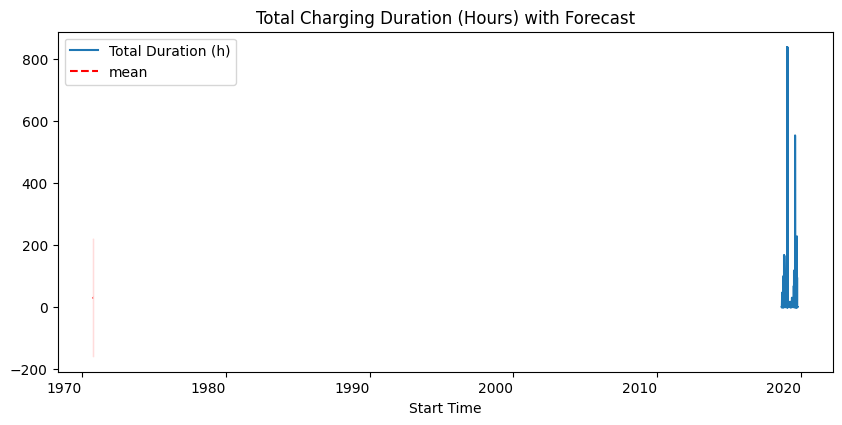

In [ ]:
import matplotlib.pyplot as plt

# Plot the historical data
df_clean.plot(figsize=(10, 5), legend=True, title='Total Charging Duration (Hours) with Forecast')

# Plot the forecasted data
forecast_df['mean'].plot(style='r--', legend=True)
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='r', alpha=0.1)
plt.show()


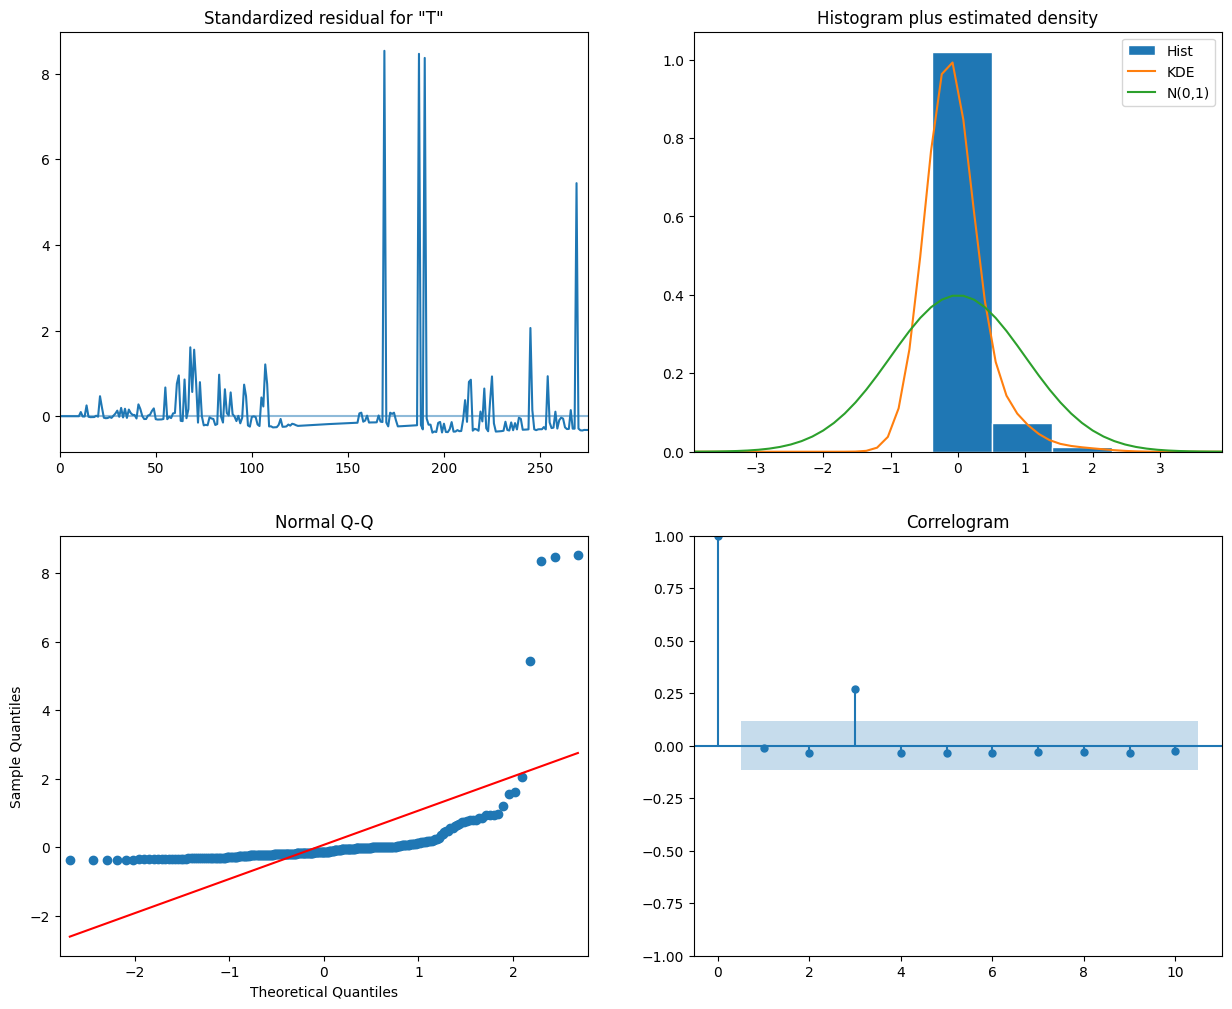

In [ ]:
arima_result.plot_diagnostics(figsize=(15, 12))
plt.show()


In [ ]:
# Define high usage based on threshold
high_usage_threshold = df['Total Duration (h)'].quantile(0.90)
df['high_usage'] = (df['Total Duration (h)'] >= high_usage_threshold)

# Analyze high usage events
high_usage_analysis = df[df['high_usage'] == True]['Charger_name'].value_counts()
print("High usage events by charger:\n", high_usage_analysis)


High usage events by charger:
 Charger_name
charger_4     7
charger_3     4
charger_8     4
charger_2     3
charger_12    3
charger_11    2
charger_5     1
charger_13    1
charger_9     1
charger_14    1
Name: count, dtype: int64


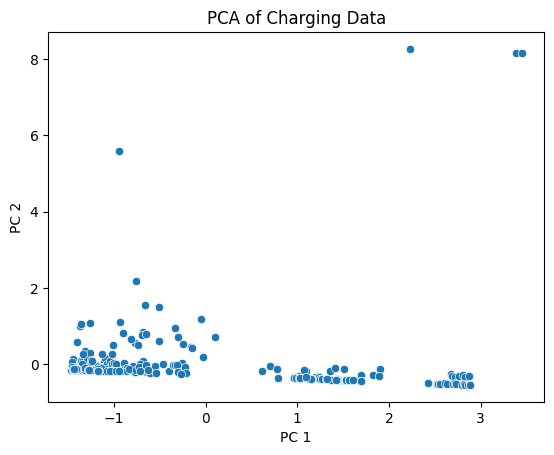

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = ['Meter Start (Wh)', 'Meter End(Wh)', 'Total Duration (h)']
x = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC 1', 'PC 2'])

# Visualize
sns.scatterplot(data=principal_df, x='PC 1', y='PC 2')
plt.title('PCA of Charging Data')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = ['Meter Start (Wh)', 'Meter End(Wh)', 'Meter Total(Wh)', 'Total Duration (h)']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Explained variance
print("Explained variance by each component:", pca.explained_variance_ratio_)


Explained variance by each component: [0.51480359 0.25370418]


In [ ]:
# Fill NaN values with a placeholder string 'Unknown'
df['Charger_name'] = df['Charger_name'].fillna('Unknown')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert all entries to string
df['Charger_name'] = df['Charger_name'].astype(str)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Assuming 'Charger_name' contains categorical data ready for transaction-like processing
te = TransactionEncoder()
te_ary = te.fit_transform(df['Charger_name'].apply(lambda x: [x]))
df2 = pd.DataFrame(te_ary, columns=te.columns_)

# Check the data
print(df2.head())


   Unknown  charger_1  charger_10  charger_11  charger_12  charger_13  \
0     True      False       False       False       False       False   
1     True      False       False       False       False       False   
2     True      False       False       False       False       False   
3     True      False       False       False       False       False   
4     True      False       False       False       False       False   

   charger_14  charger_15  charger_16  charger_2  charger_3  charger_4  \
0       False       False       False      False      False      False   
1       False       False       False      False      False      False   
2       False       False       False      False      False      False   
3       False       False       False      False      False      False   
4       False       False       False      False      False      False   

   charger_5  charger_6  charger_7  charger_8  charger_9  
0      False      False      False      False      False 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Applying Apriori to find frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(df2, min_support=0.1, use_colnames=True)

# Generating association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install lifelines

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


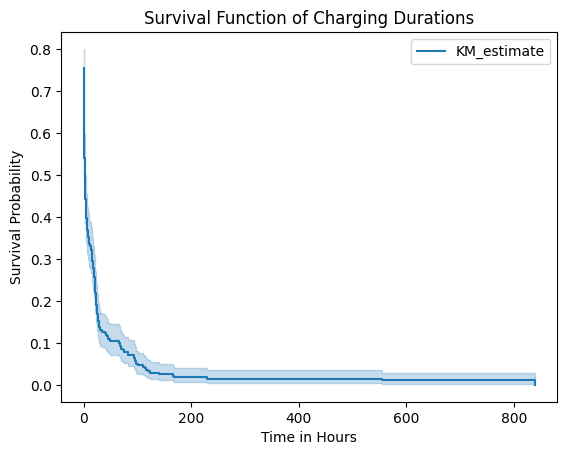

In [ ]:

from lifelines import KaplanMeierFitter

# Create a Kaplan-Meier object and fit it
kmf = KaplanMeierFitter()
kmf.fit(durations=df["Total Duration (h)"], event_observed=np.ones(len(df)))  # Assuming all charging sessions are complete

kmf.plot_survival_function()
plt.title('Survival Function of Charging Durations')
plt.xlabel('Time in Hours')
plt.ylabel('Survival Probability')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


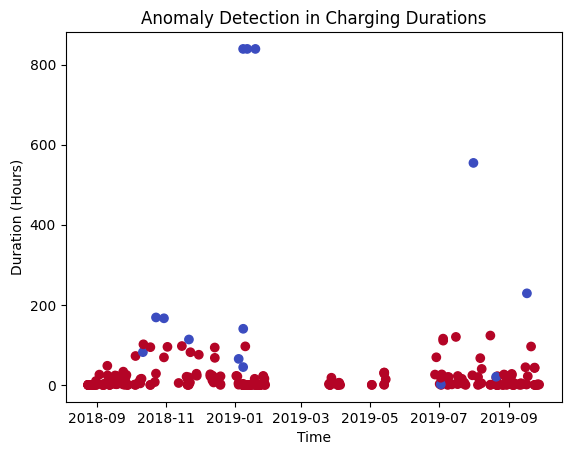

In [ ]:
from sklearn.ensemble import IsolationForest

# Normalize data before anomaly detection
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Total Duration (h)', 'Meter Total(Wh)']])

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
anomalies = iso.fit_predict(df_scaled)
df['anomaly'] = anomalies

# Visualize anomalies
plt.scatter(df.index, df['Total Duration (h)'], c=df['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in Charging Durations')
plt.xlabel('Time')
plt.ylabel('Duration (Hours)')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


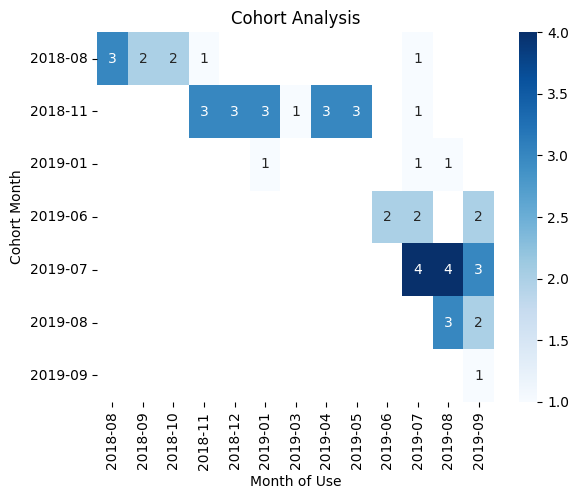

In [ ]:
if df.index.name == 'Start Time':
    df.reset_index(inplace=True)
# Convert 'Start Time' to datetime if it's in string format
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Create a CohortMonth based on the minimum 'Start Time' for each 'Charger_name'
df['CohortMonth'] = df.groupby('Charger_name')['Start Time'].transform('min').dt.to_period('M')

# Group data by CohortMonth and the extraction month from 'Start Time'
df['Month'] = df['Start Time'].dt.to_period('M')
df_cohort = df.groupby(['CohortMonth', 'Month']).agg(n_customers=('Charger_name', 'nunique')).reset_index()

# Pivot for better visualization
cohort_pivot = df_cohort.pivot_table(index='CohortMonth', columns='Month', values='n_customers')
sns.heatmap(cohort_pivot, annot=True, cmap='Blues')
plt.title('Cohort Analysis')
plt.xlabel('Month of Use')
plt.ylabel('Cohort Month')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


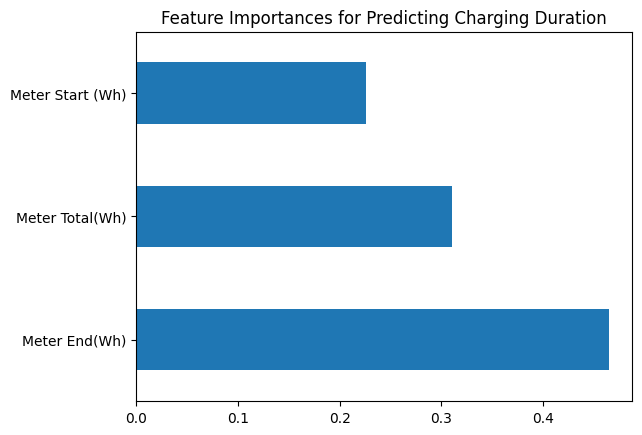

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare features and target
X = df[['Meter Start (Wh)', 'Meter End(Wh)', 'Meter Total(Wh)']]
y = df['Total Duration (h)']

# Train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Get feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importances for Predicting Charging Duration')
plt.show()
